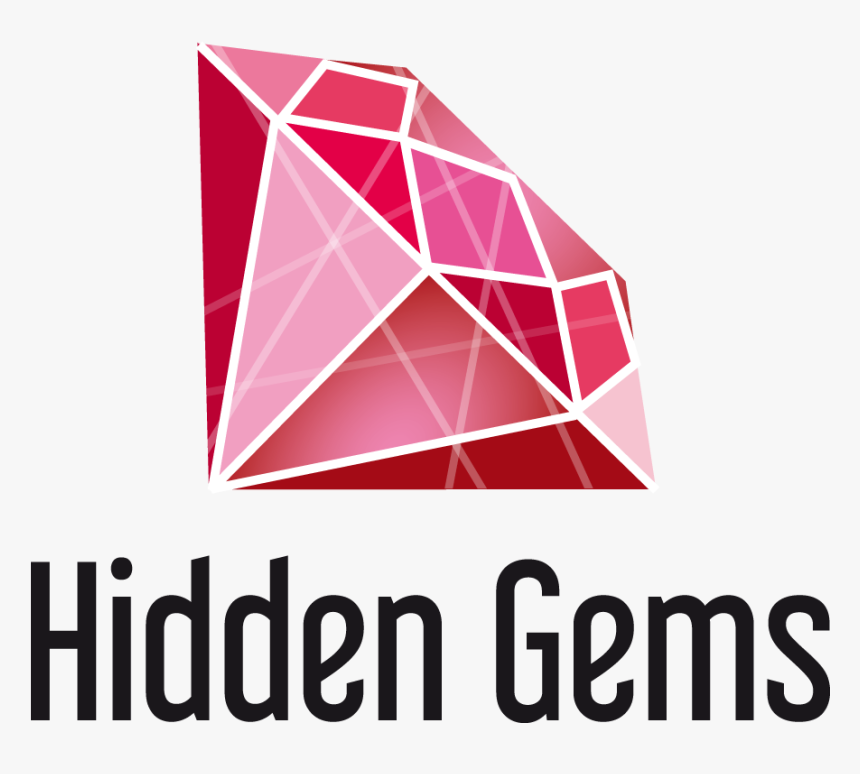

# *💎 Hidden Gems   data set from Kaggle (Used Andrada's Notebook for reference*)

# *Exploratory Data Analysis*
Performing exploratory data analysis on Hidden Gems dataset.

The dataset contains columns such as


*   vol
*   date
*   link_forum
*   link_twitter
*   notebook
*   author_kaggle
*   title
*   review
*   author_name
*   author_twitter
*   author_linkedin
*   notes







*   Import all the required Libraries(for managing arrays, to plot, customised colour palette etc....)
*   Used Image color picker to pick desired colors



Notebook Color Scheme:


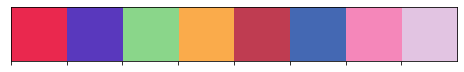

In [ ]:
# Libraries
import os
import gc
import wandb
import pandas as pd
import numpy as np

# For the plots
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# For the Wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# Custom colors
class clr:
    S = '\033[1m' + '\033[90m'
    E = '\033[0m'
    
my_colors = ["#ea284e", "#5938bd", "#8ad68a", "#faab4b", "#bf3c51", "#4468B3", "#f587ba", "#e2c4e2"]
print(clr.S+"Notebook Color Scheme:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()



*   Below function is used to plot the graph ranging from highest to lowest


In [ ]:
# ===== Plot values on bars =====
def show_values_on_bars(axs, h_v="v", space=0.4):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot
    h_v: weather or not the barplot is vertical/ horizontal'''
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
df = pd.read_csv('/content/kaggle_hidden_gems.csv')

df.head()

,vol,date,link_forum,link_twitter,notebook,author_kaggle,title,review,author_name,author_twitter,author_linkedin,notes
0,1,2020-05-12,https://www.kaggle.com/general/150603,https://twitter.com/heads0rtai1s/status/126028...,https://www.kaggle.com/hansjoerg/glmnet-xgboos...,hansjoerg,"Glmnet, XGBoost, and SVM Using tidymodels",A well-structured and documented tutorial on h...,Hansjoerg,https://twitter.com/hansjoerg_me,NaN,NaN
1,1,2020-05-12,https://www.kaggle.com/general/150603,https://twitter.com/heads0rtai1s/status/126028...,https://www.kaggle.com/parulpandey/breathe-ind...,parulpandey,Breathe India: COVID-19 effect on Pollution,A detailed work studying the interaction betwe...,Parul Pandey,https://twitter.com/pandeyparul,https://www.linkedin.com/in/parul-pandey-a5498...,NaN
2,1,2020-05-12,https://www.kaggle.com/general/150603,https://twitter.com/heads0rtai1s/status/126028...,https://www.kaggle.com/jonathanbouchet/u-s-com...,jonathanbouchet,U.S. Commercial Flights Tracker Map,Stunning maps are accompanied by lots of other...,Jonathan Bouchet,NaN,https://www.linkedin.com/in/jonathanbouchet,NaN
3,2,2020-05-19,https://www.kaggle.com/general/152383,https://twitter.com/heads0rtai1s/status/126279...,https://www.kaggle.com/andradaolteanu/unbiased...,andradaolteanu,Unbiased Look on Brazil Wildfires,A well-focused analysis on a globally importan...,Andrada Olteanu,https://twitter.com/andradaolteanuu,https://www.linkedin.com/in/andrada-olteanu-38...,NaN
4,2,2020-05-19,https://www.kaggle.com/general/152383,https://twitter.com/heads0rtai1s/status/126279...,https://www.kaggle.com/tunguz/mnist-2d-t-sne-w...,tunguz,MNIST 2D t-SNE with Rapids,One of the first Notebooks on Kaggle demonstra...,Bojan Tunguz,https://twitter.com/tunguz,https://www.linkedin.com/in/tunguz,NaN


In [ ]:
wandb.init()

In [ ]:
wandb.log({"df_hight":df.shape[0],
        "df_width":df.shape[1]})

print(clr.S+"The dataset has a size of:"+clr.E, df.shape, "\n")

print(clr.S+"Missing values:"+clr.E)
df.isnull().sum()

The dataset has a size of: (300, 12) 

Missing values:


vol                  0
date                 0
link_forum           0
link_twitter         0
notebook             0
author_kaggle        0
title                0
review               0
author_name          0
author_twitter     192
author_linkedin     91
notes              279
dtype: int64

# *HeatMap to show missing values*



*   Here it shows that 3 columns has missing values(author_twitter, author_linkedIn, notes)



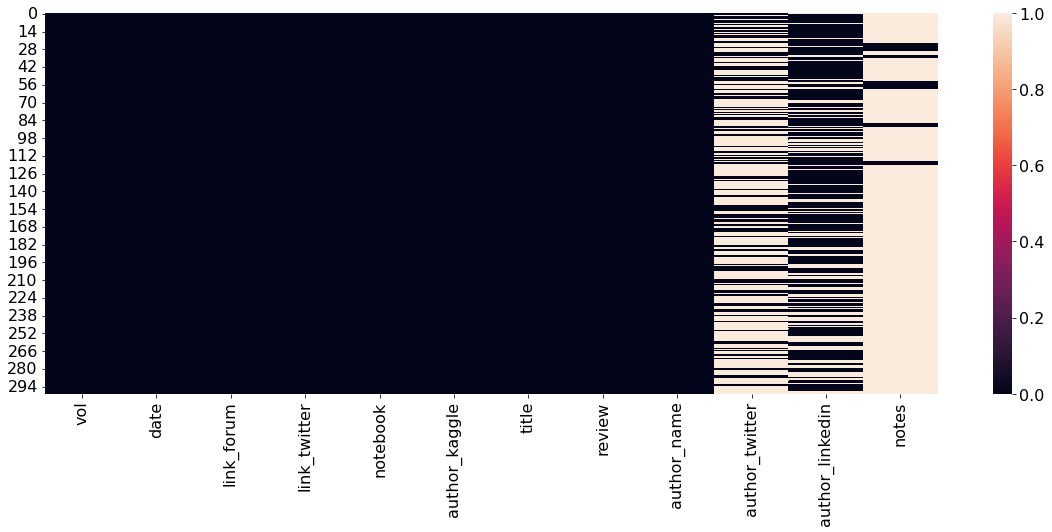

In [ ]:
plt.figure(figsize=(20,7))

sns.heatmap(df.isnull())

# ***Distplot to display missing values***



*   To display same missing values but in different format.
*   Green colour shows that there are no missing values in particular column and red shows missing values.



<Figure size 720x432 with 0 Axes>

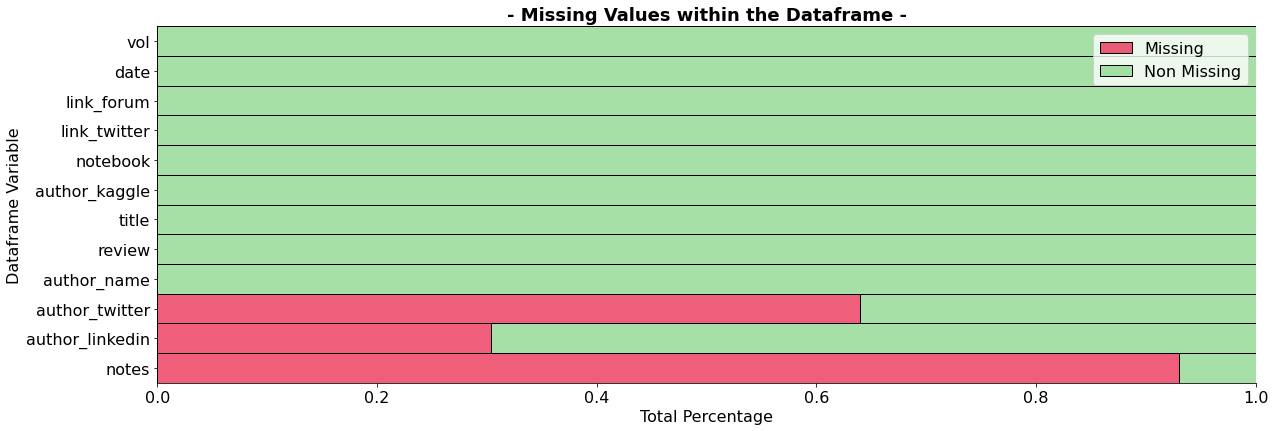

In [ ]:
# Show a dataframe of missing values
plt.figure(figsize=(10,6))

sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    # Change aspect of the chart
    aspect=3,
    height=6,
    # Change colors
    palette=[my_colors[2], my_colors[0]], 
    legend=False)

plt.title("- Missing Values within the Dataframe -", size=18, weight="bold")
plt.xlabel("Total Percentage")
plt.ylabel("Dataframe Variable")
plt.legend(["Missing", "Non Missing"]);

In [ ]:
author_count = df["author_kaggle"].value_counts().reset_index()
author_count.columns = ["author_kaggle", "count"]
author_count = author_count[author_count["count"]>1]

print(clr.S+"All kagglers that were mentioned more than once:"+clr.E)
print(author_count["author_kaggle"].values, "\n")

All kagglers that were mentioned more than once:
['jonathanbouchet' 'thedatabeast' 'umeshnarayanappa' 'jtrotman' 'kailex'
 'lucabasa' 'captcalculator' 'yclaudel' 'parulpandey' 'mhajabri'
 'thomaskonstantin' 'allunia' 'rohanrao' 'jesperdramsch' 'tunguz'
 'janiobachmann' 'datafan07' 'foolofatook' 'karnikakapoor' 'desalegngeb'
 'tanulsingh077' 'lmorgan95' 'pcbreviglieri' 'ambarish' 'frankmollard'
 'goldens' 'evanmiller' 'carlmcbrideellis' 'tanlikesmath' 'ihelon'
 'jjmewtw' 'willcanniford' 'pranav84' 'nulldata' 'koheimuramatsu'
 'poonaml' 'selfishgene' 'steubk' 'alvaroibrain' 'yassinealouini'
 'andradaolteanu' 'michau96' 'katiej277' 'jessemostipak' 'titericz'] 



# ***BarPlot to plot Kagglers who were mentioned more than once***



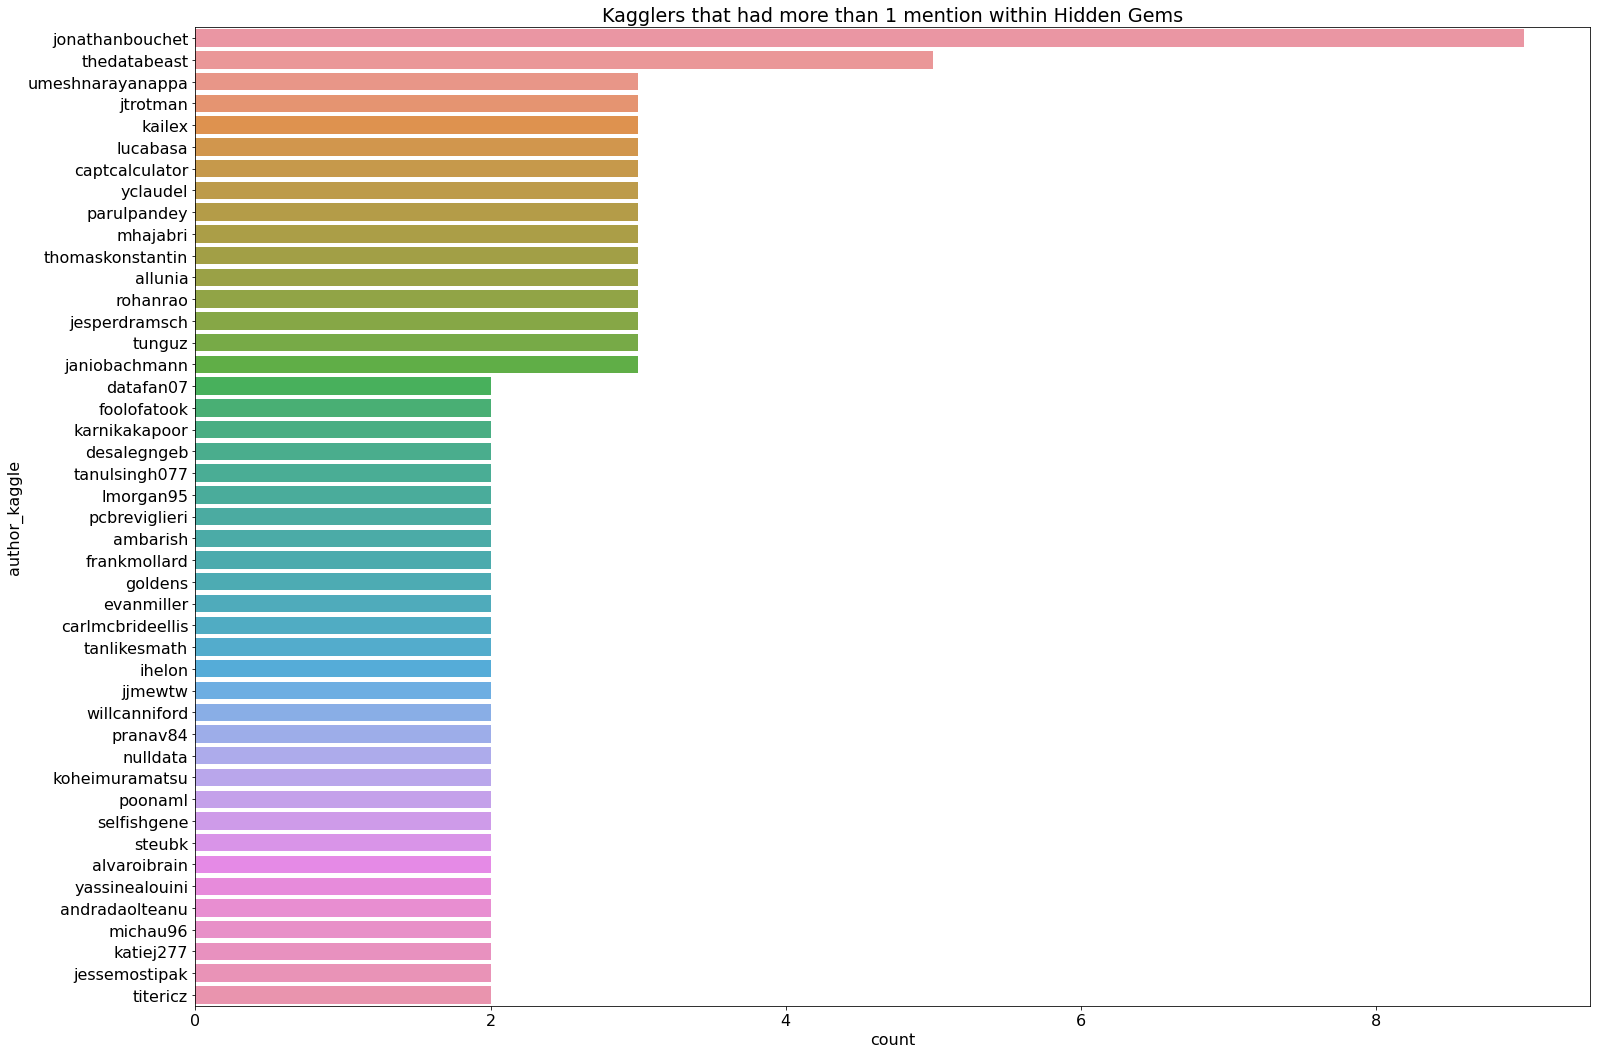

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(25, 18))

sns.barplot(data=author_count, x="count", y="author_kaggle")

plt.title('Kagglers that had more than 1 mention within Hidden Gems');

# ***Customize BarPlot for better Visuality and Understanding***

* add a custom palette
* show the title a bit of attention and love by changing the size and weight
* show values on each bar instead of using the x axis (using show_values_on_bars() custom function)
* add a vertical line to sepparate the most mentioned kaggler than the rest
* add an image of the most favorite kaggler profile and an arrow to give more detail and context
* use sns.despine() to remove the borders of the plot, so it appears more clean and easy to read

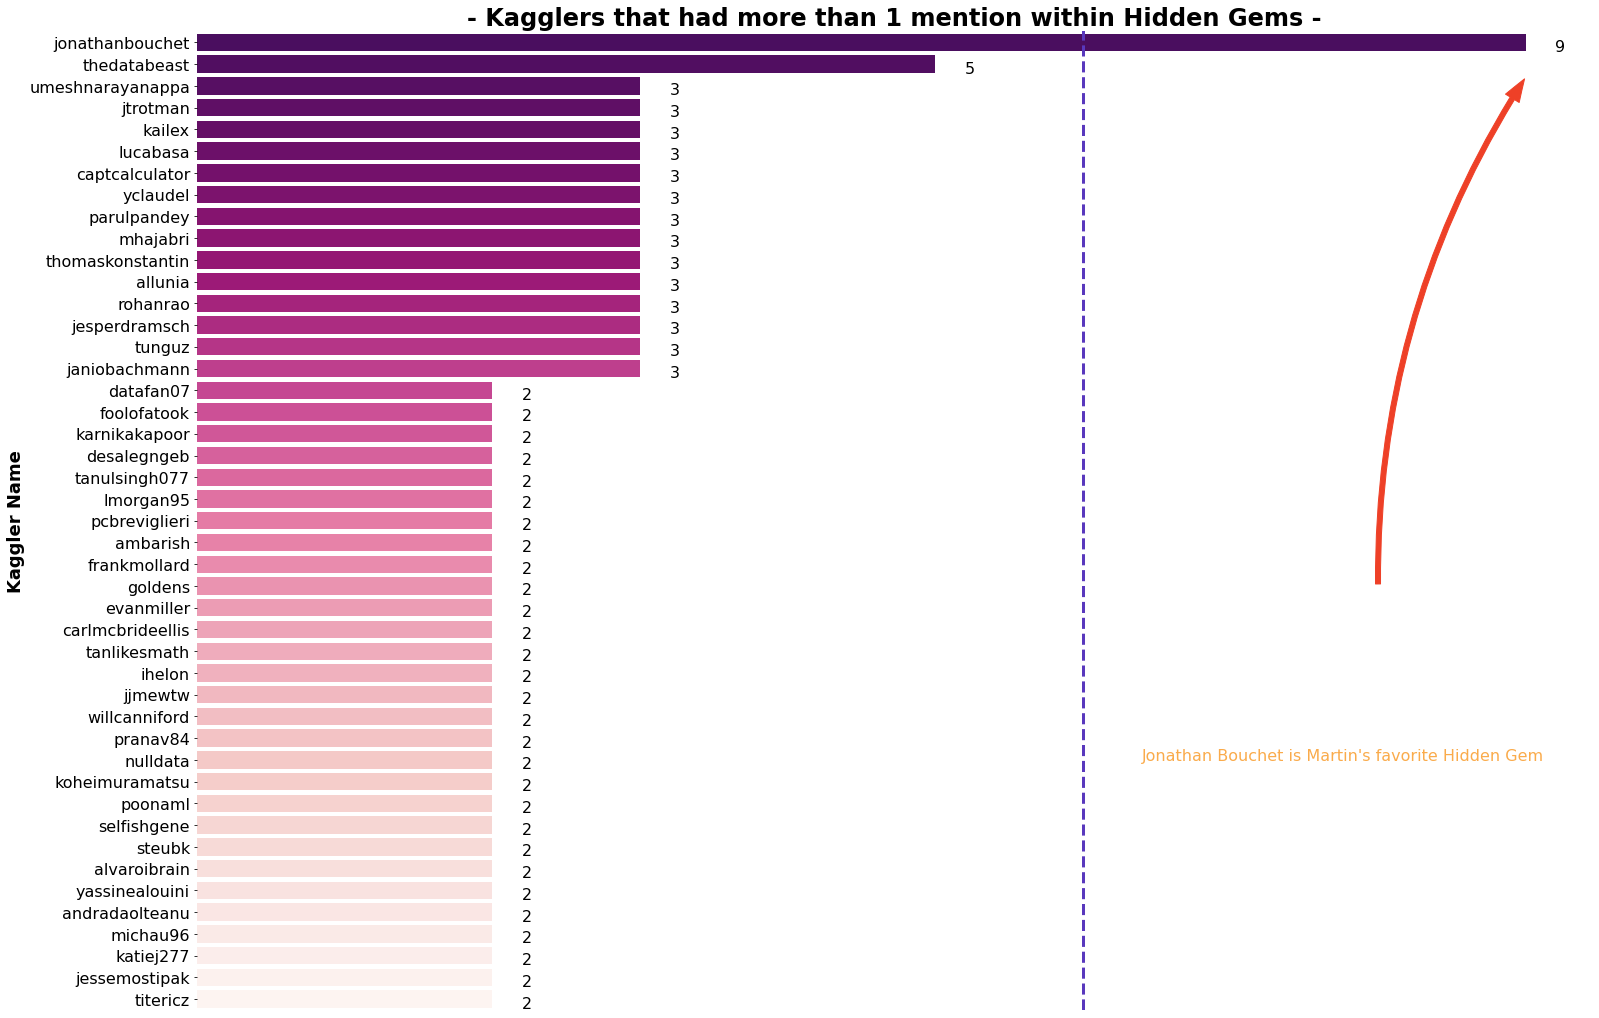

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(25, 18))

sns.barplot(data=author_count, x="count", y="author_kaggle", palette="RdPu_r")

plt.title('- Kagglers that had more than 1 mention within Hidden Gems -', size=24, weight="bold")

show_values_on_bars(axs=ax, h_v="h", space=0.2)
plt.ylabel("Kaggler Name", size = 18, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)

# Vertical line
plt.axvline(x=6, ymin=0, ymax=45, color='#5938bd', ls='--', lw=3)
plt.text(x=6.4, y=33, s="Jonathan Bouchet is Martin's favorite Hidden Gem",
         color='#faab4b', size=16)

# Arrow
style = "Simple, tail_width=5, head_width=16, head_length=23"
kw = dict(arrowstyle=style, color="#ee4027")
arrow = patches.FancyArrowPatch((8, 25), (9, 1.6),
                             connectionstyle="arc3,rad=-.15", **kw)
plt.gca().add_patch(arrow)


sns.despine(left=True, bottom=True);

# ***Create wordcloud***

* Get the text from reviews and convert to a single string
* Create the WordCloud object
* Add size of the figure and a title

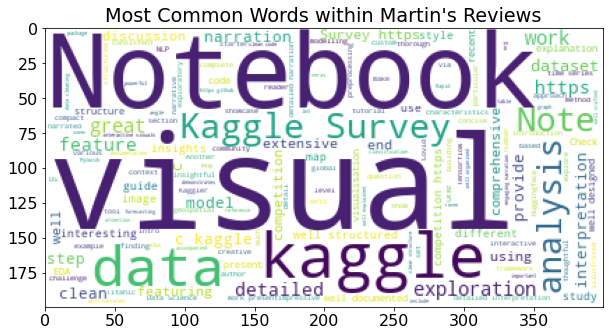

In [ ]:
# Get descriptions and convert them to a string
text = df["review"].unique()
text = " ".join(text)


# Create wordcloud object
wc = WordCloud(background_color="White",   # background of the image
               max_words=2000,             # max words to display
               stopwords=STOPWORDS,        # remove stopwords
               random_state=42)            # for reproducibility

wc.generate(text)

# Plot
fig = plt.figure(figsize=(10, 10))
plt.title("Most Common Words within Martin's Reviews")
plt.imshow(wc)
plt.show()

# ***Convert wordcloud to desired shape***

* Make a custom shape of the cloud: input a .jpg image with white background
* Custom fonts I used below can be found here: https://www.dafont.com/
* Create a customized palette using similar_color_func()
* Increase the size of the plot and remove axis

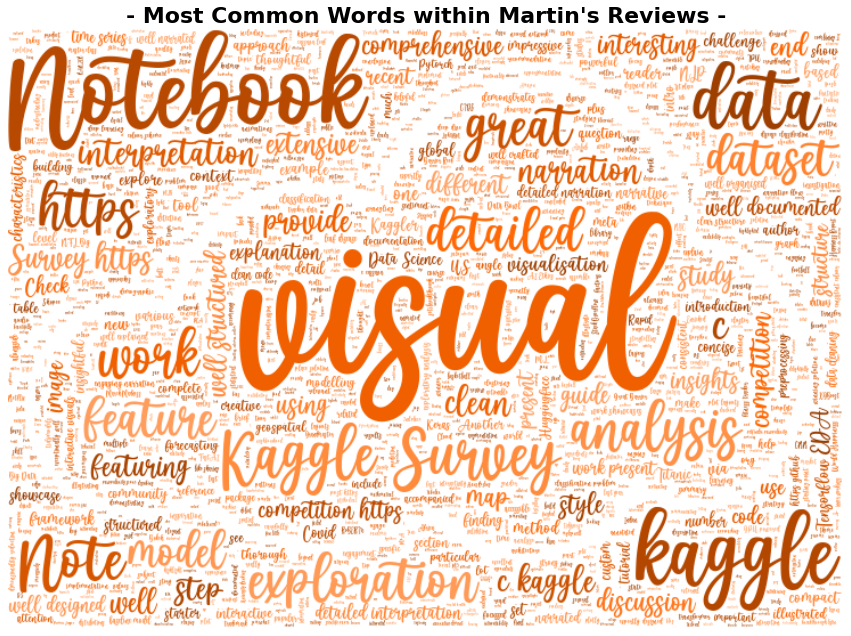

In [ ]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    '''Creates a custom function for the color of the wordcloud.'''
    
    h = 24 # 0 - 360 <- the color hue
    s = 100 # 0-100 <- the color saturation
    l = random_state.randint(30, 70) # 0 - 100 <- gradient
    
    return "hsl({}, {}%, {}%)".format(h, s, l)


# Get descriptions and convert them to a string
text = df["review"].unique()
text = " ".join(text)

# Get the mask - the form of the wordcloud
mask = np.array(Image.open('/content/Clod-shape.jpg'))

# Create wordcloud object
wc = WordCloud(mask=mask, background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], 
               font_path="/content/Baby Aletha.otf",
               color_func=similar_color_func)
wc.generate(text)

# Plot
fig = plt.figure(figsize=(15, 15))
plt.title("- Most Common Words within Martin's Reviews -",
           size=22, weight="bold")
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()